In [1]:
import pandas as pd
import numpy as np
from google.colab import files
uploaded = files.upload()



Saving potholes.csv to potholes.csv


In [2]:
import io
df = pd.read_csv(io.BytesIO(uploaded['potholes.csv']))
# Dataset is now stored in a Pandas Dataframe

In [3]:
# Import necessary libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load the potholes dataset
data = df
X = data.x

In [4]:
# Set variable y to Output Label call 'Level'
y = data.Level

In [5]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Reshape the dataset
X_train = X_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)

In [7]:
# So, we have to first Scale them to 0 to 1 considering the Maximum & Minimum values we have in that perticular coloumn dataset
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
# Create KNN model and Evaluate
knn = KNeighborsClassifier(n_neighbors=1)
model = knn.fit(X_train, y_train)
knn_predict = knn.predict(X_test)
knn_conf_matrix = confusion_matrix(y_test, knn_predict)
knn_acc_score = accuracy_score(y_test, knn_predict)
print("confusion matrix:\n", knn_conf_matrix)
print("\n")
print("Accuracy of k-NN Classification:", knn_acc_score*100, '\n')
print(classification_report(y_test, knn_predict))

confusion matrix:
 [[78 32]
 [32 58]]


Accuracy of k-NN Classification: 68.0 

              precision    recall  f1-score   support

           0       0.71      0.71      0.71       110
           1       0.64      0.64      0.64        90

    accuracy                           0.68       200
   macro avg       0.68      0.68      0.68       200
weighted avg       0.68      0.68      0.68       200



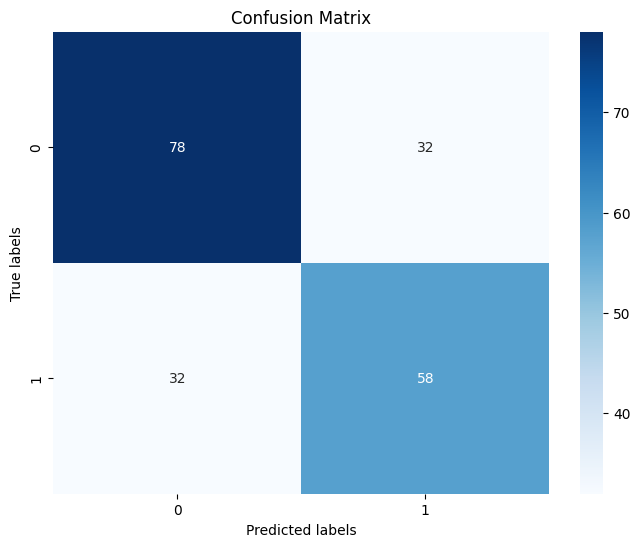

In [9]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(knn_conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()